In [31]:
yob1880 = pd.read_csv('babynames/yob1880.txt', names= ['name','sex','births'])
yob1880



,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [32]:
#성별로 그룹화 한다음, 각 그룹에 대해 births의 합계 출력
yob1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [4]:
#한번에 읽어들이기
#  pd.read_csv('babynames/yob1880.txt', names= ['name','sex','births'])
columns = ['name','sex','births']
pieces =[] 
for year in range(1880,2011):
    frame = pd.read_csv('babynames/yob%d.txt'% year, names= columns)
    frame['year'] =year
    pieces.append(frame)
print(len(pieces))

131


In [34]:
names =pd.concat(pieces, ignore_index=True)

In [35]:
print(names)

name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1690779    Zymaire   M       5  2010
1690780     Zyonne   M       5  2010
1690781  Zyquarius   M       5  2010
1690782      Zyran   M       5  2010
1690783      Zzyzx   M       5  2010

[1690784 rows x 4 columns]


In [36]:
totlaBirths = names.pivot_table('births', index='year', columns ='sex', aggfunc=sum)

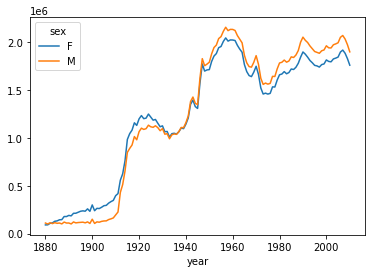

In [37]:
totlaBirths.plot()

In [38]:
#이름이 전체 출생수에서 차지하는 비율을 names에 추가
#names['prop'] =구현
#연도와 성별로 그룹화 
# names.groupby('name')
# aggfunc=(lambda x: x.count())
# names['prop']= names(aggfunc)
a = names.groupby(['year','sex']).births.sum()
# a.loc[1880].loc['F'] 
#a.[1880]['F]
# a[0]
# a.loc[1880].loc['F'] 
# round(names.loc[0]['births']/a.loc[1880].loc['F'],3)

In [39]:
def addProp(group): #그룹화된 객체가 전달됨 131*2
    group['prop']=group.births/group.births.sum()
    return group
names= names.groupby(['year','sex']).apply(addProp)

names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [40]:
#names 에서 year sex 기준으로 그룹화, prop 컬럼값의 합계
names.groupby(['year','sex'])['prop'].sum()
names.groupby(['year','sex'])['prop'].max()

year  sex
1880  F      0.077643
      M      0.087381
1881  F      0.075243
      M      0.087039
1882  F      0.075558
               ...   
2008  M      0.011075
2009  F      0.012159
      M      0.010660
2010  F      0.012923
      M      0.011523
Name: prop, Length: 262, dtype: float64

In [41]:
def getTop1000(group):
    return group.sort_values('births', ascending=False)[:1000]

top1000 =names.groupby(['year','sex']).apply(getTop1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [42]:
top1000.reset_index(drop =True,inplace=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [43]:
# top1000에서 성별이 남자인 데이터를 추출하여 boys
# top1000에서 여자인 데이터를 추출하여 girls
boys= top1000[top1000['sex']=='M']
boys
girls=top1000[top1000['sex']=='F'] 
girls


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
260872,Violeta,F,250,2010,0.000142
260873,Leilah,F,250,2010,0.000142
260874,Alaysia,F,250,2010,0.000142
260875,Dania,F,249,2010,0.000142


In [44]:
totlaBirths=top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

In [45]:
totlaBirths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E8A70C988>,
      dtype=object)

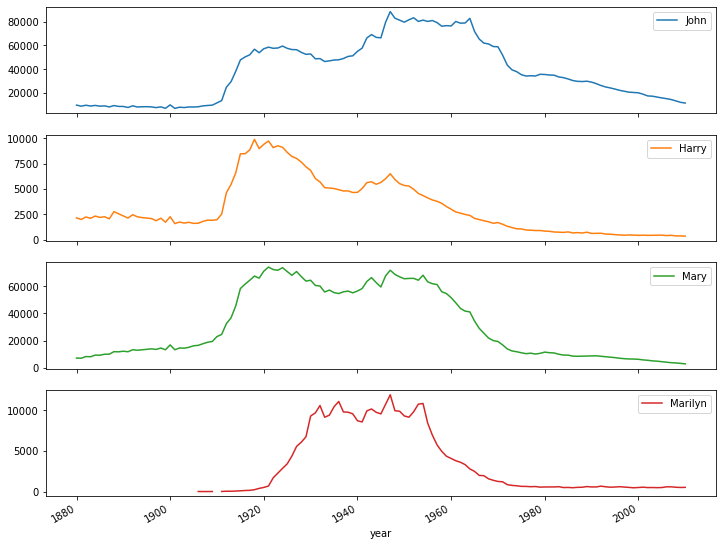

In [46]:
subset =totlaBirths[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12,10))

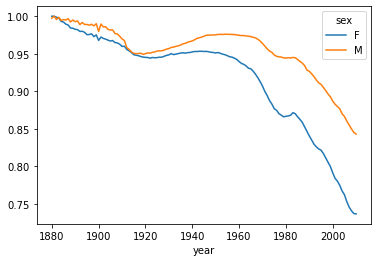

In [47]:
table =top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot()

In [48]:
df = boys[boys.year==2010]
df
df.sort_values('prop', ascending=False)
df.sort_values('prop', ascending=False).prop # prop열만 추출하겠다. 
df.sort_values('prop', ascending=False).prop.cumsum() # 누적합(cumsum)을 구하겠다 
propCumsum=df.sort_values('prop', ascending=False).prop.cumsum() # propCumsum에 저장
type(propCumsum) # Series type
propCumsum.searchsorted(0.5)
propCumsum.iloc[116]
# 상위 117명의 아이들이름이 전체에서 50%넘게 차지
propCumsum.values.searchsorted

<function ndarray.searchsorted>

In [49]:
df =boys[boys.year==1900]
in1900 =df.sort_values('prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5)+1 #인덱스 번호가 출력된다  +1을 붙이면~
in1900


40877    0.065319
40878    0.122308
40879    0.170437
40880    0.206338
40881    0.233584
           ...   
41848    0.979489
41847    0.979542
41846    0.979595
41845    0.979648
41876    0.979702
Name: prop, Length: 1000, dtype: float64

In [50]:
names.name
#이름의 마지막글자의 분포? 분포의 변화?

0               Mary
1               Anna
2               Emma
3          Elizabeth
4             Minnie
             ...    
1690779      Zymaire
1690780       Zyonne
1690781    Zyquarius
1690782        Zyran
1690783        Zzyzx
Name: name, Length: 1690784, dtype: object

In [51]:
names.name.str[-1]

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [56]:
getLastLetter=lambda x : x[-1]
lastLetters = names.name.map(getLastLetter)
lastLetters.name='last_letter'
lastLetters
names.pivot_table('births',index=lastLetters, columns=['sex','year'], aggfunc=sum)

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [61]:
subtable =table.reindex(columns=[1910,1960,2010], level='year')
subtable

KeyError: 'Requested level (year) does not match index name (None)'